In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
import warnings
warnings.filterwarnings(action = "ignore")

### Dataset 1 User Data Dataset

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/User_Data.csv')
df1.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
print(df1.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [ ]:
print(df1.dtypes)

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the "Gender" column
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])

# Display the first 5 rows after label encoding
print(df1.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000          0
3  15603246       0   27            57000          0
4  15804002       1   19            76000          0


In [ ]:
# Initialize the StandardScaler
#scaler = StandardScaler()

# Scale all columns in the DataFrame
#df1_scaled = scaler.fit_transform(df1)

# Convert the scaled array back to a DataFrame
#df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)

# Display the first 5 rows of the scaled DataFrame
#print(df1_scaled.head())

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale all columns in the DataFrame using Min-Max scaling
df1_scaled = scaler.fit_transform(df1)

# Convert the scaled array back to a DataFrame
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)

# Display the first 5 rows of the scaled DataFrame
df1_scaled.head(5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,0.232636,1.0,0.023810,0.029630,0.0
1,0.982732,1.0,0.404762,0.037037,0.0
2,0.409926,0.0,0.190476,0.207407,0.0
3,0.147083,0.0,0.214286,0.311111,0.0
4,0.954801,1.0,0.023810,0.451852,0.0


In [ ]:
#Its a classification task

In [ ]:
# Define x_scaled and y
x_scaled = df1_scaled.drop('Purchased', axis=1)  # Assuming 'Purchased' is the target column
y = df1_scaled['Purchased']

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x_scaled, y, test_size=0.25, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.6, random_state=42)

In [ ]:
print(x_train.shape,x_test.shape,x_valid.shape)
print(y_train.shape,y_test.shape,y_valid.shape)

(300, 4) (60, 4) (40, 4)
(300,) (60,) (40,)


In [ ]:
def evaluate(model,model_name,x_train = x_train,y_train = y_train,x_test = x_test,y_test = y_test,x_valid = x_valid):
  print(f"Model performance for{model_name}")
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)
  y_valid_pred = model.predict(x_valid)

  #confusion matrix
  plt.figure(figsize = (10,10))
  sb.heatmap(confusion_matrix(y_train,y_train_pred),annot = True)
  plt.title('Confusion Matrix')
  plt.show()

  #precision score
  precision_score_train = precision_score(y_train,y_train_pred)
  precision_score_test = precision_score(y_test,y_test_pred)
  precision_score_valid = precision_score(y_valid,y_valid_pred)

  #recallscore
  recall_score_train = recall_score(y_train,y_train_pred)
  recall_score_test = recall_score(y_test,y_test_pred)
  recall_score_valid = recall_score(y_valid,y_valid_pred)

  #f1 score
  f1_score_train = f1_score(y_train,y_train_pred)
  f1_score_test = f1_score(y_test,y_test_pred)
  f1_score_valid = f1_score(y_valid,y_valid_pred)

  print("Precision Score Train:",precision_score_train)
  print("Precision Score Test:",precision_score_test)
  print("Precision Score Validation",precision_score_valid)

  print("recall Score Train:",recall_score_train)
  print("recal Score Test:",recall_score_test)
  print("recall Score Validation",recall_score_valid)

  print("f1 Score Train:",f1_score_train)
  print("f1 Score Test:",f1_score_test)
  print("f1 Score Validation",f1_score_valid)



  return precision_score_train,precision_score_test,precision_score_valid,recall_score_train,recall_score_test,recall_score_valid,f1_score_train,f1_score_test,f1_score_valid


Model performance forLogisticRegression()


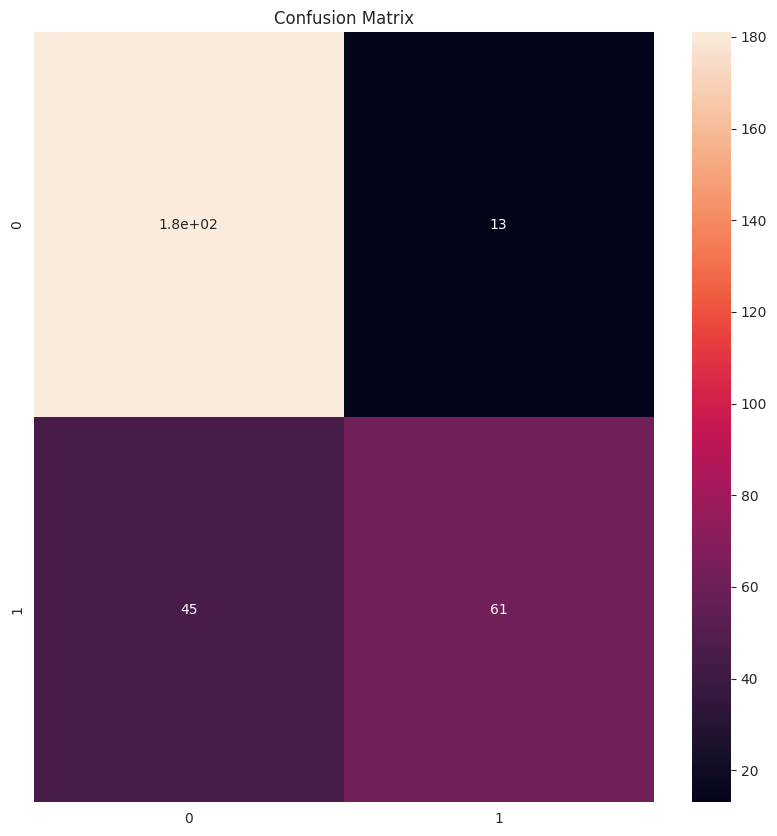

Precision Score Train: 0.8243243243243243
Precision Score Test: 0.9333333333333333
Precision Score Validation 1.0
recall Score Train: 0.5754716981132075
recal Score Test: 0.6363636363636364
recall Score Validation 0.6666666666666666
f1 Score Train: 0.6777777777777778
f1 Score Test: 0.7567567567567568
f1 Score Validation 0.8


In [ ]:
clf1 = LogisticRegression()
clf1.fit(x_train,y_train)
LR = evaluate(clf1,clf1)

Model performance forKNeighborsClassifier(n_neighbors=3)


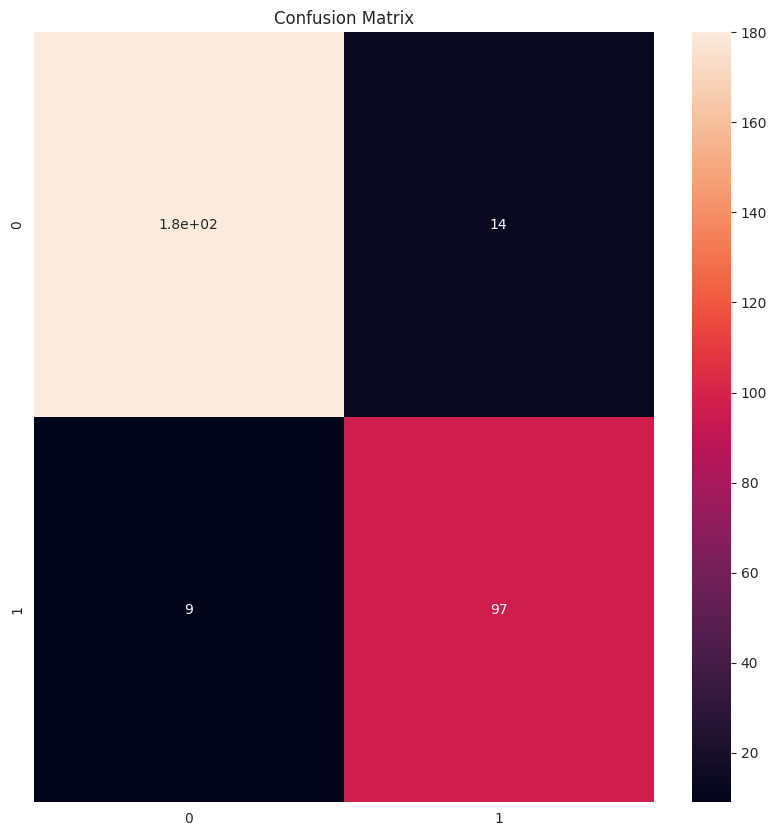

Precision Score Train: 0.8738738738738738
Precision Score Test: 0.8571428571428571
Precision Score Validation 0.9230769230769231
recall Score Train: 0.9150943396226415
recal Score Test: 0.8181818181818182
recall Score Validation 0.8
f1 Score Train: 0.8940092165898619
f1 Score Test: 0.8372093023255814
f1 Score Validation 0.8571428571428571


In [ ]:
clf2 = KNeighborsClassifier(n_neighbors = 3)
clf2.fit(x_train,y_train)
KNN = evaluate(clf2,clf2)

In [ ]:
model_performance = [["Logistic Regression",LR[0],LR[1],LR[3],LR[4],LR[5],LR[6],LR[7],LR[8]],
                     ["Knearest Neighbors",KNN[0],KNN[1],KNN[3],KNN[4],KNN[5],KNN[6],KNN[7],KNN[8]]]
model_performance = pd.DataFrame(model_performance,columns = ["Precision Score Train","Precision Score Test","Precision Score Validation","Recall Score Train","Recall Score Test","Recall Score Validation","F1 Score Train","F1 Score Test","F1 Score Validation"])
model_performance

,Precision Score Train,Precision Score Test,Precision Score Validation,Recall Score Train,Recall Score Test,Recall Score Validation,F1 Score Train,F1 Score Test,F1 Score Validation
0,Logistic Regression,0.824324,0.933333,0.575472,0.636364,0.666667,0.677778,0.756757,0.800000
1,Knearest Neighbors,0.873874,0.857143,0.915094,0.818182,0.800000,0.894009,0.837209,0.857143


### Dataset 2 : Diabetes Dataset

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df2.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(df2.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print(df2.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale all columns in the DataFrame using Min-Max scaling
df2_scaled = scaler.fit_transform(df2)

# Convert the scaled array back to a DataFrame
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)

# Display the first 5 rows of the scaled DataFrame
df2_scaled.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [ ]:
#Its classification task

In [ ]:
# Define x_scaled and y
x_scaled = df2_scaled.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target column
y = df2_scaled['Outcome']
x_train, x_temp, y_train, y_temp = train_test_split(x_scaled, y, test_size=0.25, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.6, random_state=42)

In [ ]:
def evaluate(model,model_name,x_train = x_train,y_train = y_train,x_test = x_test,y_test = y_test,x_valid = x_valid):
  print(f"Model performance for{model_name}")
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)
  y_valid_pred = model.predict(x_valid)

  #confusion matrix
  plt.figure(figsize = (10,10))
  sb.heatmap(confusion_matrix(y_train,y_train_pred),annot = True)
  plt.title('Confusion Matrix')
  plt.show()

  #precision score
  precision_score_train = precision_score(y_train,y_train_pred)
  precision_score_test = precision_score(y_test,y_test_pred)
  precision_score_valid = precision_score(y_valid,y_valid_pred)

  #recallscore
  recall_score_train = recall_score(y_train,y_train_pred)
  recall_score_test = recall_score(y_test,y_test_pred)
  recall_score_valid = recall_score(y_valid,y_valid_pred)

  #f1 score
  f1_score_train = f1_score(y_train,y_train_pred)
  f1_score_test = f1_score(y_test,y_test_pred)
  f1_score_valid = f1_score(y_valid,y_valid_pred)

  print("Precision Score Train:",precision_score_train)
  print("Precision Score Test:",precision_score_test)
  print("Precision Score Validation",precision_score_valid)

  print("recall Score Train:",recall_score_train)
  print("recal Score Test:",recall_score_test)
  print("recall Score Validation",recall_score_valid)

  print("f1 Score Train:",f1_score_train)
  print("f1 Score Test:",f1_score_test)
  print("f1 Score Validation",f1_score_valid)



  return precision_score_train,precision_score_test,precision_score_valid,recall_score_train,recall_score_test,recall_score_valid,f1_score_train,f1_score_test,f1_score_valid


Model performance forLogistic Regression


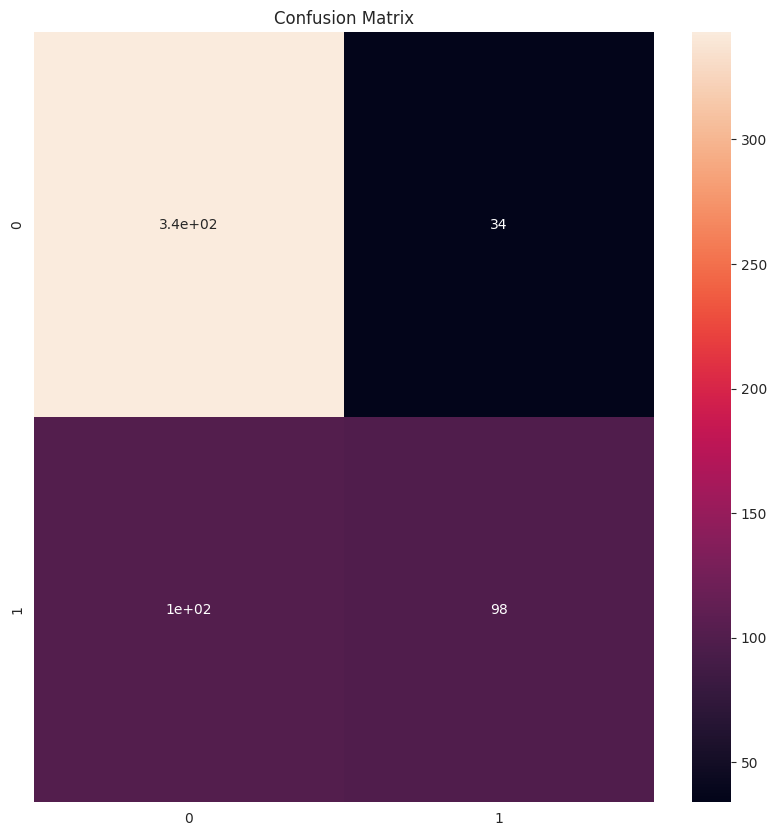

Precision Score Train: 0.7424242424242424
Precision Score Test: 0.6756756756756757
Precision Score Validation 0.6666666666666666
recall Score Train: 0.49246231155778897
recal Score Test: 0.5681818181818182
recall Score Validation 0.56
f1 Score Train: 0.5921450151057402
f1 Score Test: 0.617283950617284
f1 Score Validation 0.6086956521739131


(0.7424242424242424,
 0.6756756756756757,
 0.6666666666666666,
 0.49246231155778897,
 0.5681818181818182,
 0.56,
 0.5921450151057402,
 0.617283950617284,
 0.6086956521739131)

In [ ]:
clf3 = LogisticRegression()
clf3.fit(x_train, y_train)
evaluate(clf3, "Logistic Regression")

Model performance forKNeighborsClassifier(n_neighbors=3)


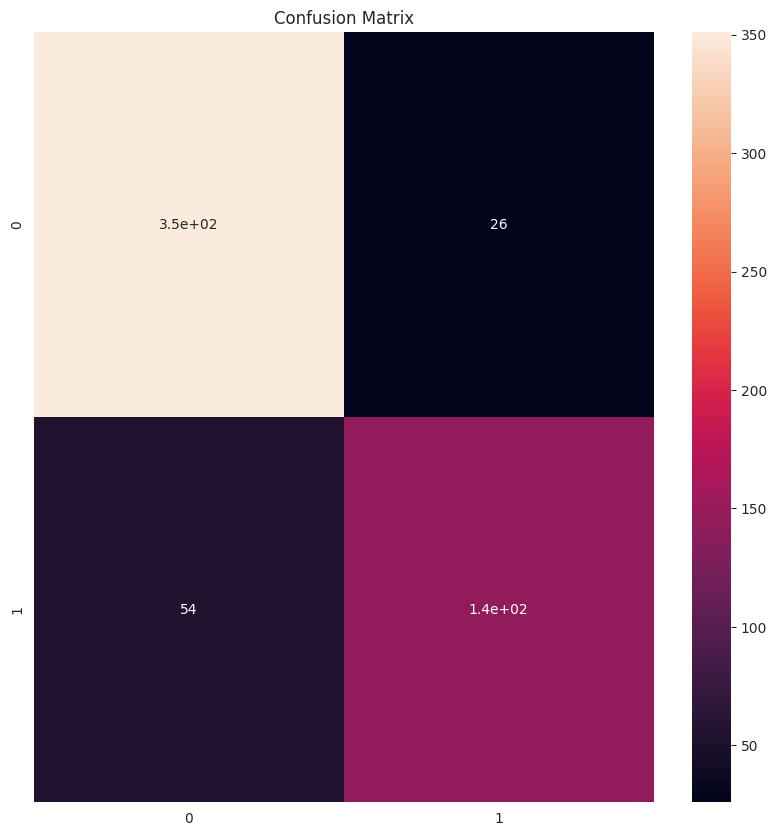

Precision Score Train: 0.847953216374269
Precision Score Test: 0.5952380952380952
Precision Score Validation 0.5217391304347826
recall Score Train: 0.7286432160804021
recal Score Test: 0.5681818181818182
recall Score Validation 0.48
f1 Score Train: 0.7837837837837839
f1 Score Test: 0.5813953488372093
f1 Score Validation 0.4999999999999999


In [ ]:
clf4 = KNeighborsClassifier(n_neighbors = 3)
clf4.fit(x_train,y_train)
KNN = evaluate(clf4,clf4)


In [ ]:
model_performance = [["Logistic Regression",LR[0],LR[1],LR[3],LR[4],LR[5],LR[6],LR[7],LR[8]],
                     ["Knearest Neighbors",KNN[0],KNN[1],KNN[3],KNN[4],KNN[5],KNN[6],KNN[7],KNN[8]]]
model_performance = pd.DataFrame(model_performance,columns = ["Precision Score Train","Precision Score Test","Precision Score Validation","Recall Score Train","Recall Score Test","Recall Score Validation","F1 Score Train","F1 Score Test","F1 Score Validation"])
model_performance

,Precision Score Train,Precision Score Test,Precision Score Validation,Recall Score Train,Recall Score Test,Recall Score Validation,F1 Score Train,F1 Score Test,F1 Score Validation
0,Logistic Regression,0.824324,0.933333,0.575472,0.636364,0.666667,0.677778,0.756757,0.8
1,Knearest Neighbors,0.847953,0.595238,0.728643,0.568182,0.480000,0.783784,0.581395,0.5


### Dataset 3 : 50 Startups Dataset

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/50_Startups.csv')
df3.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
print(df3.isnull().sum())
print(df3.dtypes)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the "State" column
df3['State'] = label_encoder.fit_transform(df3['State'])

# Display the first 5 rows after label encoding
print(df3.head())

   R&D Spend  Administration  Marketing Spend  State     Profit
0  165349.20       136897.80        471784.10      2  192261.83
1  162597.70       151377.59        443898.53      0  191792.06
2  153441.51       101145.55        407934.54      1  191050.39
3  144372.41       118671.85        383199.62      2  182901.99
4  142107.34        91391.77        366168.42      1  166187.94


In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale all columns in the DataFrame using Min-Max scaling
df3_scaled = scaler.fit_transform(df3)

# Convert the scaled array back to a DataFrame
df3_scaled = pd.DataFrame(df3_scaled, columns=df3.columns)

# Display the first 5 rows of the scaled DataFrame
df3_scaled.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,1.000000,0.651744,1.000000,1.0,1.000000
1,0.983359,0.761972,0.940893,0.0,0.997355
2,0.927985,0.379579,0.864664,0.5,0.993178
3,0.873136,0.512998,0.812235,1.0,0.947292
4,0.859438,0.305328,0.776136,0.5,0.853171


In [ ]:
#Its regression task

In [ ]:
# Define x_scaled and y
x_scaled = df3_scaled.drop('Profit', axis=1)  # Assuming 'Profit' is the target column
y = df3_scaled['Profit']
x_train, x_temp, y_train, y_temp = train_test_split(x_scaled, y, test_size=0.25, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.6, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression(model, model_name, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, x_valid=x_valid, y_valid=y_valid):
    print(f"Model performance for {model_name}")

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_valid_pred = model.predict(x_valid)

    # Evaluation metrics
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mae_valid = mean_absolute_error(y_valid, y_valid_pred)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_valid = mean_squared_error(y_valid, y_valid_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    rmse_valid = np.sqrt(mse_valid)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    r2_valid = r2_score(y_valid, y_valid_pred)

    print("Mean Absolute Error Train:", mae_train)
    print("Mean Absolute Error Test:", mae_test)
    print("Mean Absolute Error Validation:", mae_valid)

    print("Mean Squared Error Train:", mse_train)
    print("Mean Squared Error Test:", mse_test)
    print("Mean Squared Error Validation:", mse_valid)

    print("Root Mean Squared Error Train:", rmse_train)
    print("Root Mean Squared Error Test:", rmse_test)
    print("Root Mean Squared Error Validation:", rmse_valid)

    print("R2 Score Train:", r2_train)
    print("R2 Score Test:", r2_test)
    print("R2 Score Validation:", r2_valid)

    return mae_train, mae_test, mae_valid, mse_train, mse_test, mse_valid, rmse_train, rmse_test, rmse_valid, r2_train, r2_test, r2_valid


In [ ]:
# Initialize the LinearRegression model
clf_linear = LinearRegression()

# Train the LinearRegression model
clf_linear.fit(x_train, y_train)

# Evaluate the LinearRegression model using your evaluate function
evaluate_regression(clf_linear, "Linear Regression")


Model performance for Linear Regression
Mean Absolute Error Train: 0.036843269970978795
Mean Absolute Error Test: 0.03677716360529196
Mean Absolute Error Validation: 0.05031956050195428
Mean Squared Error Train: 0.0025360685182104557
Mean Squared Error Test: 0.0021302433261230274
Mean Squared Error Validation: 0.0037607771865087484
Root Mean Squared Error Train: 0.050359393544903375
Root Mean Squared Error Test: 0.046154559104415974
Root Mean Squared Error Validation: 0.06132517579680264
R2 Score Train: 0.9544070449918146
R2 Score Test: 0.9492527627900192
R2 Score Validation: 0.8195187055761048


(0.036843269970978795,
 0.03677716360529196,
 0.05031956050195428,
 0.0025360685182104557,
 0.0021302433261230274,
 0.0037607771865087484,
 0.050359393544903375,
 0.046154559104415974,
 0.06132517579680264,
 0.9544070449918146,
 0.9492527627900192,
 0.8195187055761048)

In [ ]:
# Initialize the SVR model
clf_svr = SVR()

# Train the SVR model
clf_svr.fit(x_train, y_train)

# Evaluate the SVR model using the evaluate_regression function
evaluate_regression(clf_svr, "SVR Regression")


Model performance for SVR Regression
Mean Absolute Error Train: 0.05712183110664177
Mean Absolute Error Test: 0.09395890489656133
Mean Absolute Error Validation: 0.06252906169373737
Mean Squared Error Train: 0.00460250088707246
Mean Squared Error Test: 0.022100264929813315
Mean Squared Error Validation: 0.006122403236845359
Root Mean Squared Error Train: 0.06784173411015125
Root Mean Squared Error Test: 0.1486615785259033
Root Mean Squared Error Validation: 0.07824578734248483
R2 Score Train: 0.9172571188977574
R2 Score Test: 0.4735214644057598
R2 Score Validation: 0.7061832684119518


(0.05712183110664177,
 0.09395890489656133,
 0.06252906169373737,
 0.00460250088707246,
 0.022100264929813315,
 0.006122403236845359,
 0.06784173411015125,
 0.1486615785259033,
 0.07824578734248483,
 0.9172571188977574,
 0.4735214644057598,
 0.7061832684119518)

In [ ]:
model_performance = [["Linear Regression"] + list(evaluate_regression(clf_linear, "Linear Regression")),
                     ["SVR Regression"] + list(evaluate_regression(clf_svr, "SVR Regression"))]

model_performance = pd.DataFrame(model_performance, columns=["Model", "Mean Absolute Error Train", "Mean Absolute Error Test", "Mean Absolute Error Validation",
                                                           "Mean Squared Error Train", "Mean Squared Error Test", "Mean Squared Error Validation",
                                                           "Root Mean Squared Error Train", "Root Mean Squared Error Test", "Root Mean Squared Error Validation",
                                                           "R2 Score Train", "R2 Score Test", "R2 Score Validation"])



Model performance for Linear Regression
Mean Absolute Error Train: 0.036843269970978795
Mean Absolute Error Test: 0.03677716360529196
Mean Absolute Error Validation: 0.05031956050195428
Mean Squared Error Train: 0.0025360685182104557
Mean Squared Error Test: 0.0021302433261230274
Mean Squared Error Validation: 0.0037607771865087484
Root Mean Squared Error Train: 0.050359393544903375
Root Mean Squared Error Test: 0.046154559104415974
Root Mean Squared Error Validation: 0.06132517579680264
R2 Score Train: 0.9544070449918146
R2 Score Test: 0.9492527627900192
R2 Score Validation: 0.8195187055761048
Model performance for SVR Regression
Mean Absolute Error Train: 0.05712183110664177
Mean Absolute Error Test: 0.09395890489656133
Mean Absolute Error Validation: 0.06252906169373737
Mean Squared Error Train: 0.00460250088707246
Mean Squared Error Test: 0.022100264929813315
Mean Squared Error Validation: 0.006122403236845359
Root Mean Squared Error Train: 0.06784173411015125
Root Mean Squared Err